In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
test_df = pd.read_csv('test.csv')
print(test_df.shape)
test_df.info()

(10194, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10194 non-null  int64  
 1   clonesize             10194 non-null  float64
 2   honeybee              10194 non-null  float64
 3   bumbles               10194 non-null  float64
 4   andrena               10194 non-null  float64
 5   osmia                 10194 non-null  float64
 6   MaxOfUpperTRange      10194 non-null  float64
 7   MinOfUpperTRange      10194 non-null  float64
 8   AverageOfUpperTRange  10194 non-null  float64
 9   MaxOfLowerTRange      10194 non-null  float64
 10  MinOfLowerTRange      10194 non-null  float64
 11  AverageOfLowerTRange  10194 non-null  float64
 12  RainingDays           10194 non-null  float64
 13  AverageRainingDays    10194 non-null  float64
 14  fruitset              10194 non-null  float64
 15  fruitma

In [3]:
test_df.head(5)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [12]:
test_df["id"]

0        15289
1        15290
2        15291
3        15292
4        15293
         ...  
10189    25478
10190    25479
10191    25480
10192    25481
10193    25482
Name: id, Length: 10194, dtype: int64

In [13]:
test_df.loc[0,"id"]

15289

In [18]:
test_df.loc[:10,"id"]

0     15289
1     15290
2     15291
3     15292
4     15293
5     15294
6     15295
7     15296
8     15297
9     15298
10    15299
Name: id, dtype: int64

In [15]:
test_df.iloc[0,0]

15289

In [17]:
test_df.iloc[:10,0]

0    15289
1    15290
2    15291
3    15292
4    15293
5    15294
6    15295
7    15296
8    15297
9    15298
Name: id, dtype: int64

In [20]:
test_df["id"].apply(lambda x: x+1)

0        15290
1        15291
2        15292
3        15293
4        15294
         ...  
10189    25479
10190    25480
10191    25481
10192    25482
10193    25483
Name: id, Length: 10194, dtype: int64

In [24]:
test_df.sort_values(by="id")[(test_df["id"] < 20000) & (test_df["osmia"] > .30)]

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
5,15294,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.451911,0.435621,32.814561
6,15295,12.5,0.25,0.25,0.75,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.572611,0.482119,40.161668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,19995,25.0,0.50,0.38,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.529164,0.432722,36.671456
4707,19996,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.514303,0.458966,37.209554
4708,19997,12.5,0.25,0.25,0.50,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.476911,0.418220,34.629764
4709,19998,25.0,0.50,0.25,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.493693,0.430078,35.891310


<AxesSubplot: xlabel='AverageRainingDays'>

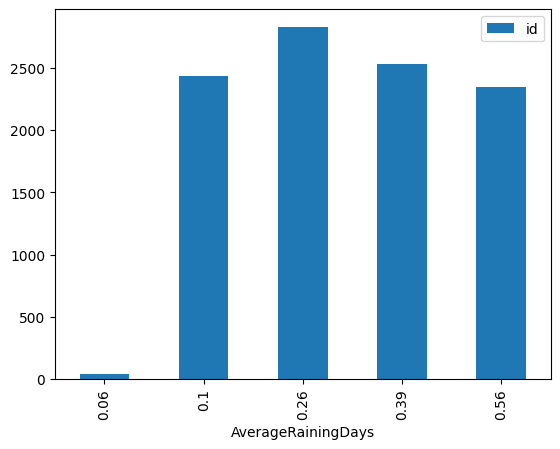

In [11]:
test_df.groupby("AverageRainingDays").count().plot(kind="bar", y="id")

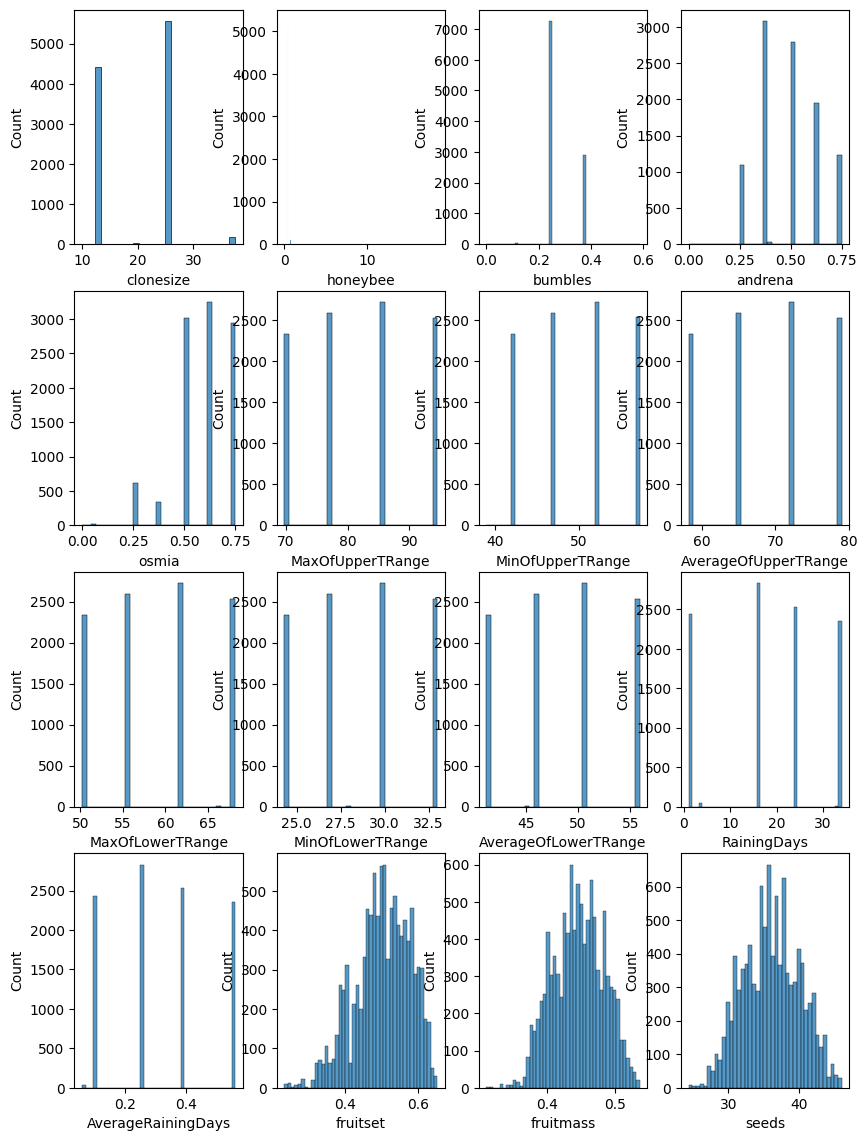

In [4]:
fig, ax = plt.subplots(4,4, figsize =(10,14))

for i, column in enumerate(test_df.columns[1:]):
    sns.histplot(test_df[column], ax=ax[i//4, i%4])

In [7]:
train = pd.read_csv('train.csv')
train.head(5)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [44]:
fold = KFold(n_splits=5, shuffle=True, random_state=42)
regressor = ElasticNetCV(cv=fold, random_state=0)

# create folds 
X = train.iloc[:,1:-1]
y = train['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE:  746.3015504568742


In [27]:
y_pred

array([6030.16588201, 6030.16588201, 6030.16588201, ..., 6030.16588201,
       6030.16588201, 6030.16588201])

(0.0, 10000.0)

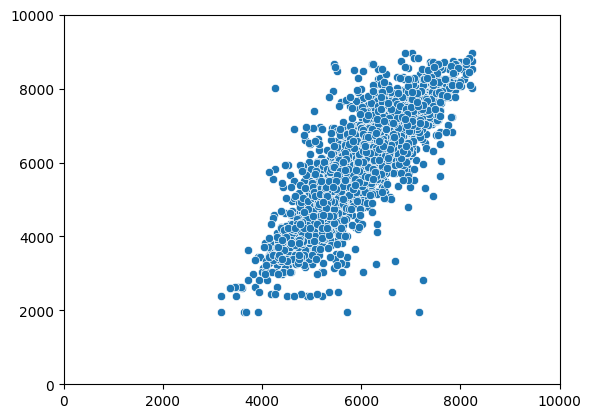

In [45]:
sns.scatterplot(y=y_test.values, x=y_pred)

# set scale 
plt.xlim(0, 10000)
plt.ylim(0, 10000)

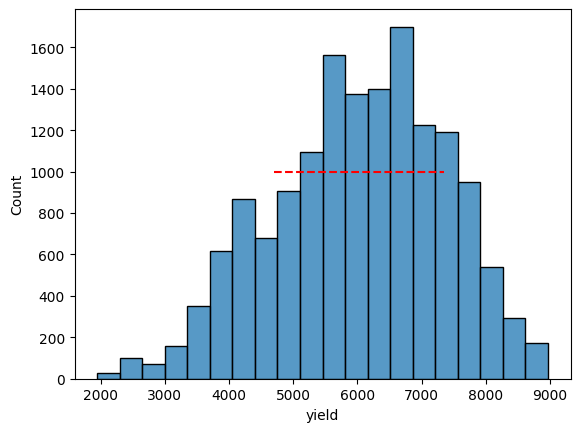

In [20]:
# histogram of yield 
sns.histplot(y, bins=20)

plt.hlines(y=1000, xmin=y.mean()-rmse, xmax=y.mean()+rmse, color='red', linestyles='dashed')

In [48]:
results = regressor.predict(test_df.iloc[:,1:])

submission = pd.DataFrame({'id': test_df['id'], 'yield': results})
submission.to_csv('submission.csv', index=False)